In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'data/processed/cleaned_data.csv')
df.head()

,Maker,Adv_year,Adv_month,Color,Gearbox,Fuel_type,Price,Seat_num,Door_num,Engine_size,Prod_year,Model,Body_type,Runned_miles
0,Bentley,2018,4,Silver,Automatic,Petrol,21500,5.0,4.0,6.8,2000.0,Arnage,Saloon,60000.0
1,Bentley,2018,6,Grey,Automatic,Petrol,28750,5.0,4.0,6.8,2002.0,Arnage,Saloon,44000.0
2,Bentley,2017,11,Blue,Automatic,Petrol,29999,5.0,4.0,6.8,2002.0,Arnage,Saloon,55000.0
3,Bentley,2018,4,Green,Automatic,Petrol,34948,5.0,4.0,6.8,2003.0,Arnage,Saloon,14000.0
4,Bentley,2017,11,Grey,Automatic,Petrol,26555,5.0,4.0,6.8,2003.0,Arnage,Saloon,61652.0


## Correlation matrix for numeric columns

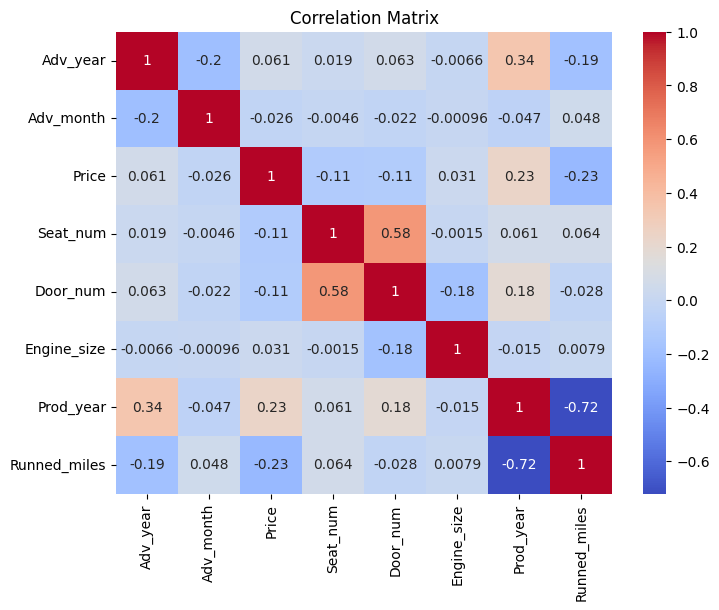

In [3]:
num_cols = df.select_dtypes(include=["number"]).columns

plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## Box plots for categorical columns

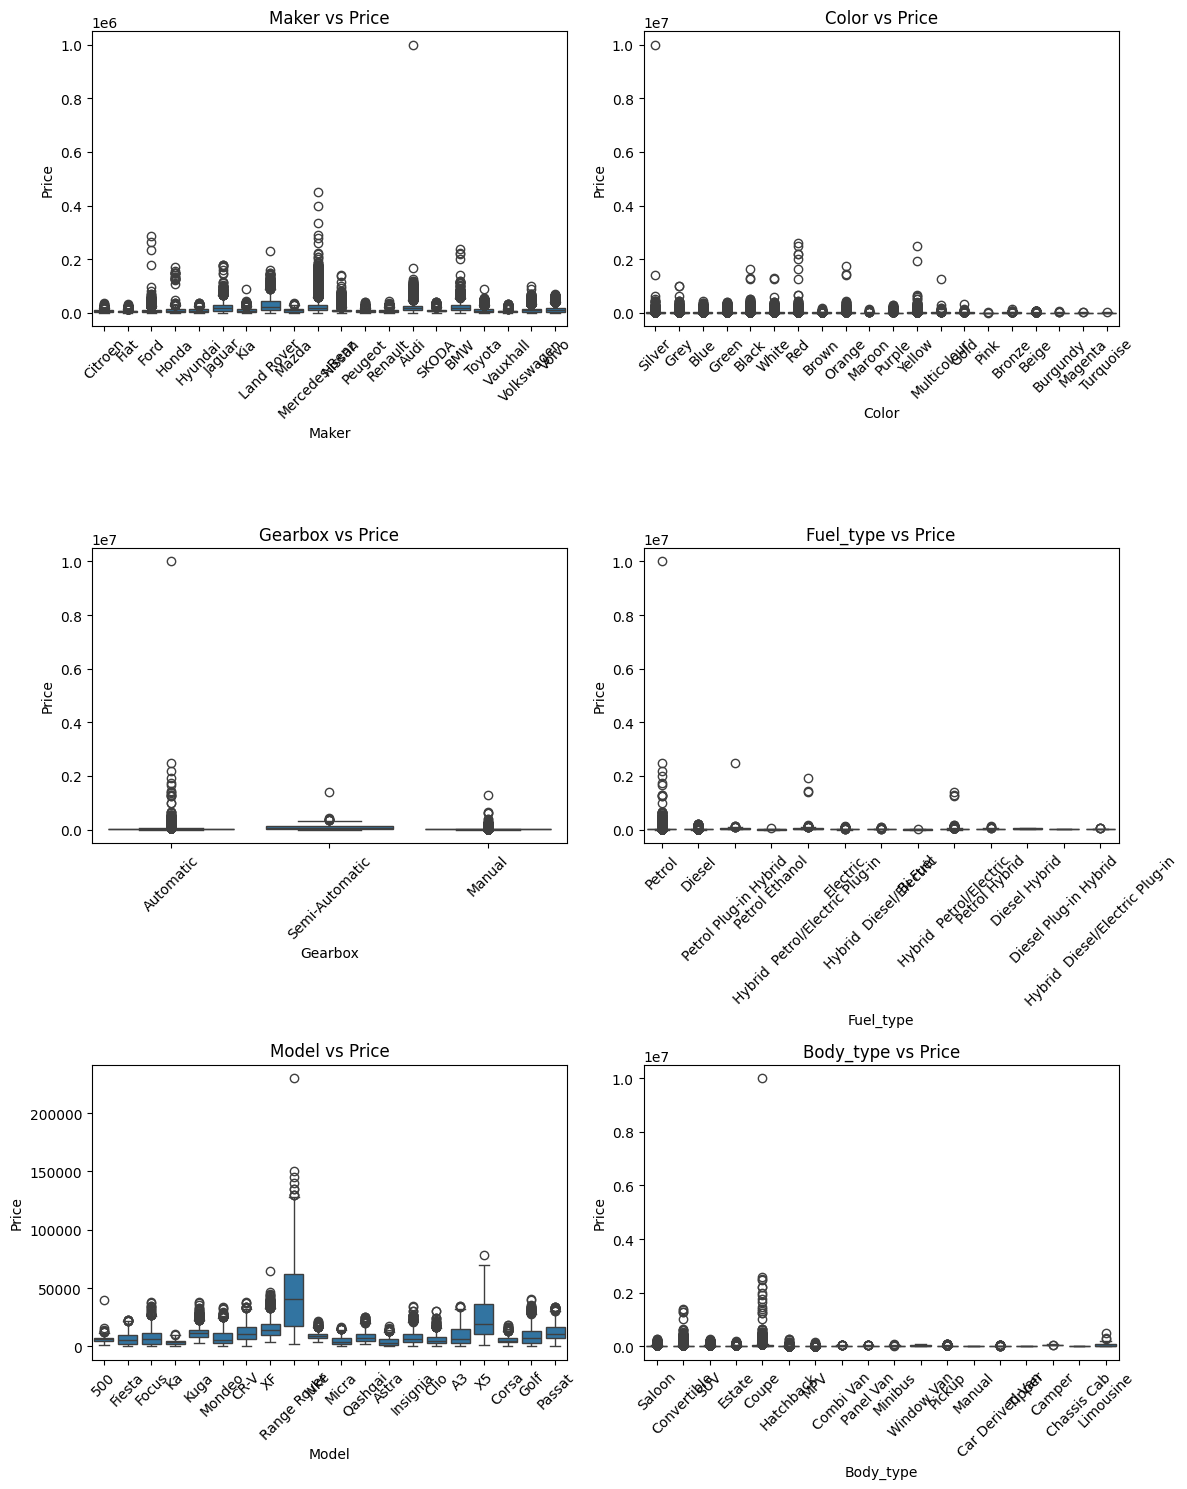

In [4]:
cat_cols = df.select_dtypes(include=["object"]).columns

n = len(cat_cols)
cols = 2
rows = int(np.ceil(n / cols))

fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    
    ax = axes[i]
    if df[col].nunique() > 20:
        top_vals = df[col].value_counts().index[:20]
        subset = df[df[col].isin(top_vals)]
    else:
        subset = df

    sns.boxplot(x=subset[col], y=subset["Price"], ax=ax)
    ax.set_title(f"{col} vs Price")
    ax.set_xlabel(col)
    ax.set_ylabel("Price")
    ax.tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Check numeric data distribution

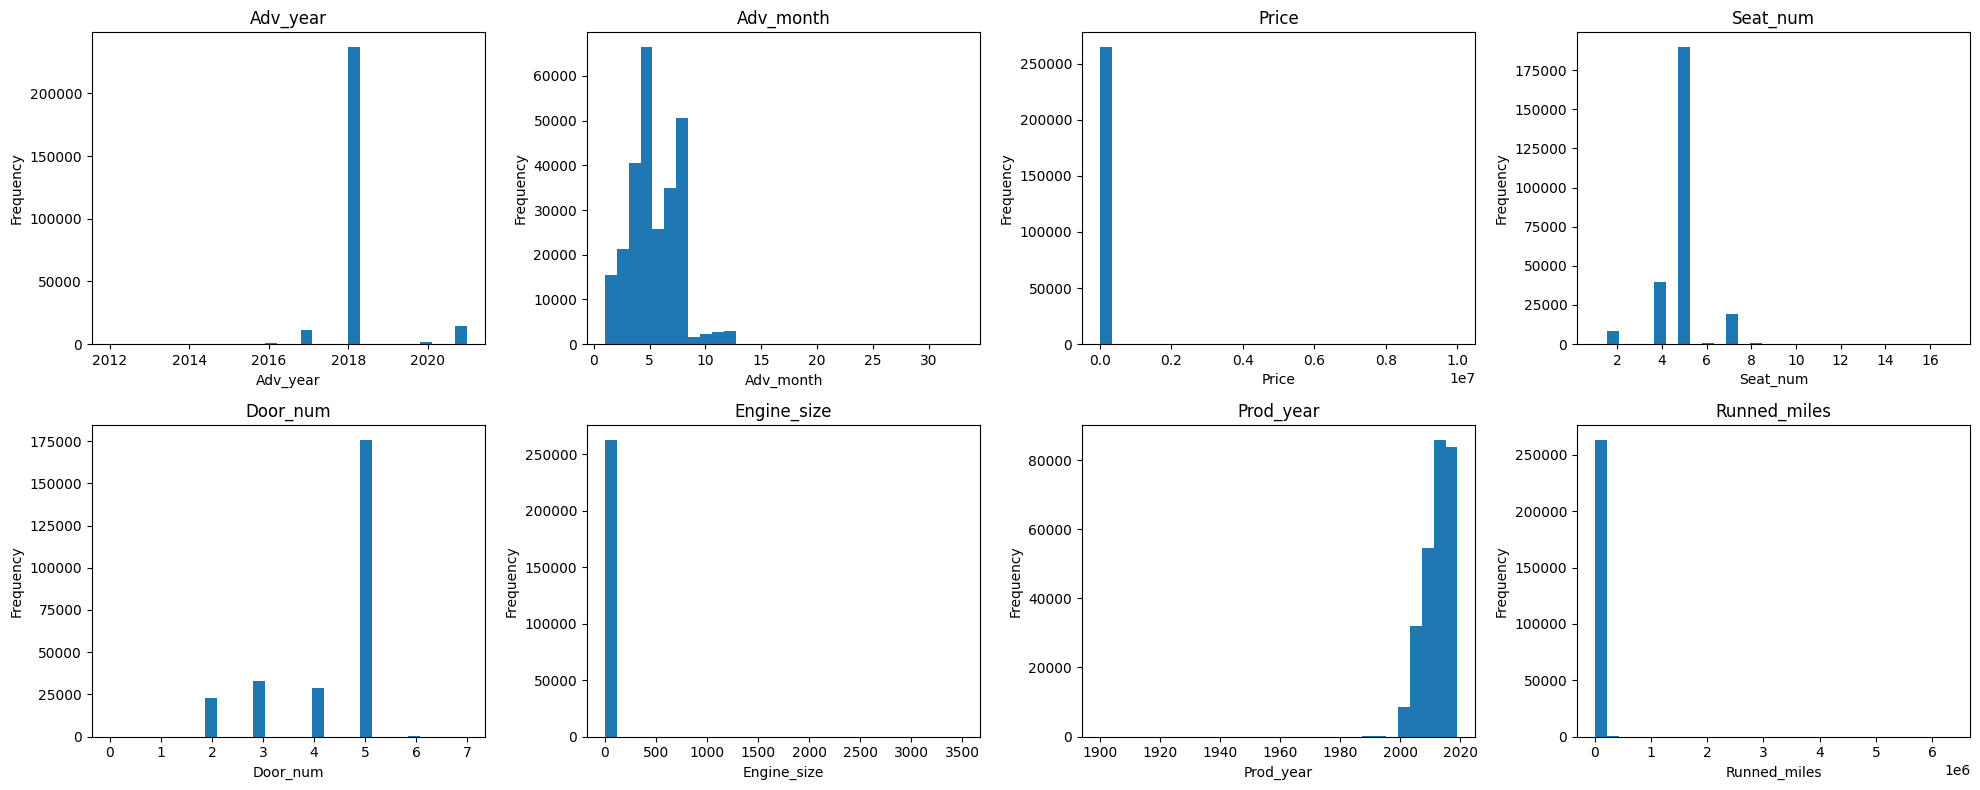

In [5]:
num_cols = df.select_dtypes(include=["number"]).columns

n = len(num_cols)
cols = 4
rows = int(np.ceil(n / cols))

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].hist(df[col].dropna(), bins=30)
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()